# Discrete Lifetime Distributions

The empirical lifetime distribution can be evaluated by the theoretical lifetime ditribution, which follows a discrete phase-type distribution. This type of distribution has the probability mass function of; 

$P(T=t) = \pi (Ps)^t ps$

$\pi$ is the distribution of states $1,2,3,4$ at $t=0$. $Ps$ is a $4x4$ submatrix of P, containing all P execpt for the last row and column. $ps$ is a column vector with the probabilities of dying at state $1,2,3,4$.

The empirical lifetimes are estimated by the code generated in task 1:

In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005], 
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

max_state = 5
n_women = 1000
women_states = np.ones(n_women)
lifetime = np.zeros(n_women)
states = np.arange(1,max_state+1)

# Run until max_state is reached for all individuals
while np.min(women_states) < max_state:
    
    # Make temporary vector with women's states
    new_women_states = women_states
    
    # Update states
    for i in range(1, int(np.max(women_states)) + 1):
        index_state = np.where(women_states == i)[0]
        new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
    women_states = new_women_states
    
    # Update liftime
    index_lifetime = np.where(women_states < max_state)[0]
    lifetime[index_lifetime] += 1

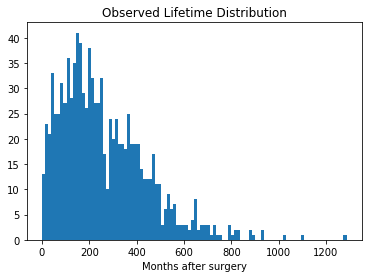

In [3]:
# Plot histogram of lifetime
plt.figure()
plt.hist(lifetime, bins = 100)
plt.title("Observed Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("")
plt.show()

In [4]:
from numpy.linalg import matrix_power

# Sub matrix of P
Ps = P[:-1,:-1]
# Distribution at time 0
pi = np.array([1, 0, 0, 0])
# A probabilities of dying from state 1
ps = P[:-1,-1]

# Computing the expected lifetimes 
expected = np.zeros(int(max(lifetime)))
for i in range(int(max(lifetime))):
    expected[i] = (pi @ matrix_power(Ps, i)) @ np.transpose(ps)


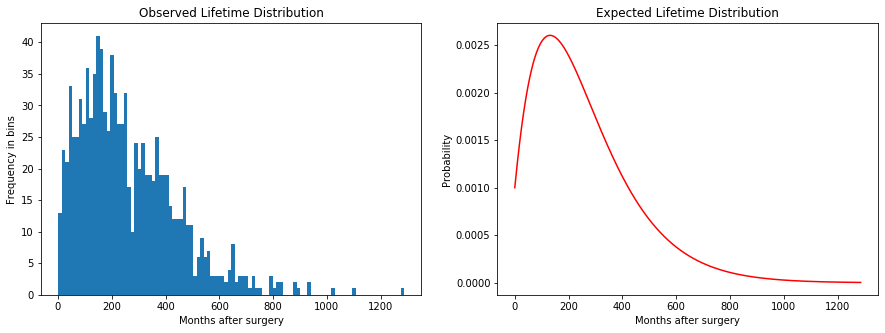

In [5]:
# Plot histogram of lifetime
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(lifetime, bins = 100)
plt.title("Observed Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("Frequency in bins")
plt.subplot(122)
plt.plot(expected, 'r')
plt.title("Expected Lifetime Distribution")
plt.xlabel("Months after surgery")
plt.ylabel("Probability")
plt.show()

In [6]:
# Sub matrix of P
Ps = P[:-1,:-1]
# A probabilities of dying from state 1
ps = P[:-1,-1]
# A vector of ones 
ones_vector = np.ones(len(pi))
# The identity matrix 
I = np.identity(len(pi))
# The mean of the expected probability functions 
mean_T  = pi @ np.linalg.inv((I-Ps)) @ ones_vector

print('Mean of the observed dstribtution:             ', np.mean(lifetime))
print('Mean of the discrete phase-type distribution:  ', mean_T)

Mean of the observed dstribtution:              259.446
Mean of the discrete phase-type distribution:   262.3716153127931


As seen by the presented plots above, and indicated by the means of the two distributions, the expected and the observed distribution does indeed follow each other, however not said that they are drawn from the same distribution. 